<a href="https://colab.research.google.com/github/Nurdaylight/An-Econ-771/blob/main/PS1/Test%20with%20libs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mostly GPT

In [1]:
# save to    /PS1
import urllib.request

url = "https://raw.githubusercontent.com/Nurdaylight/An-Econ-771/main/PS1/data/ps1.csv"
file_path = "/content/ps1.csv"

# Download the file
with urllib.request.urlopen(url) as response:
    content = response.read().decode('utf-8')

with open(file_path, "w") as f:
    f.write(content)

print("Downloaded to", file_path)


Downloaded to /content/ps1.csv


In [8]:
import numpy as np


data = np.loadtxt(
    "/content/ps1.csv",
    delimiter=",",
    skiprows=1      # skip variable names
)

# Split variables
y = data[:, 0]                 # (n,)
x1 = data[:, 1]
x2 = data[:, 2]

# Design matrix with constant
X = np.column_stack((
    np.ones(len(y)),           # constant
    x1,
    x2
))                             # (n, 3)

# OLS estimator
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("Estimated coefficients:")
print("Intercept:", beta_hat[0])
print("Beta x1 :", beta_hat[1])
print("Beta x2 :", beta_hat[2])

Estimated coefficients:
Intercept: 1.80136554097308
Beta x1 : 3.4107893360918786
Beta x2 : 0.989512370964871


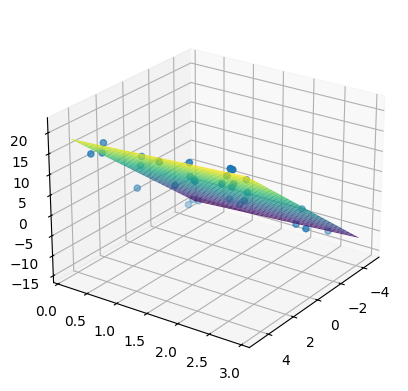

In [36]:
import matplotlib.pyplot as plt

x1_grid = np.linspace(x1.min(), x1.max(), 30)
x2_grid = np.linspace(x2.min(), x2.max(), 30)

X1, X2 = np.meshgrid(x1_grid, x2_grid)
Y_plane = beta_hat[0] + beta_hat[1] * X1 + beta_hat[2] * X2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y)
ax.plot_surface(
    X1,
    X2,
    Y_plane,
    alpha=0.9,
    cmap='viridis',
    edgecolor='none'    # clean look
)
ax.view_init(elev=24, azim=35)
plt.show()

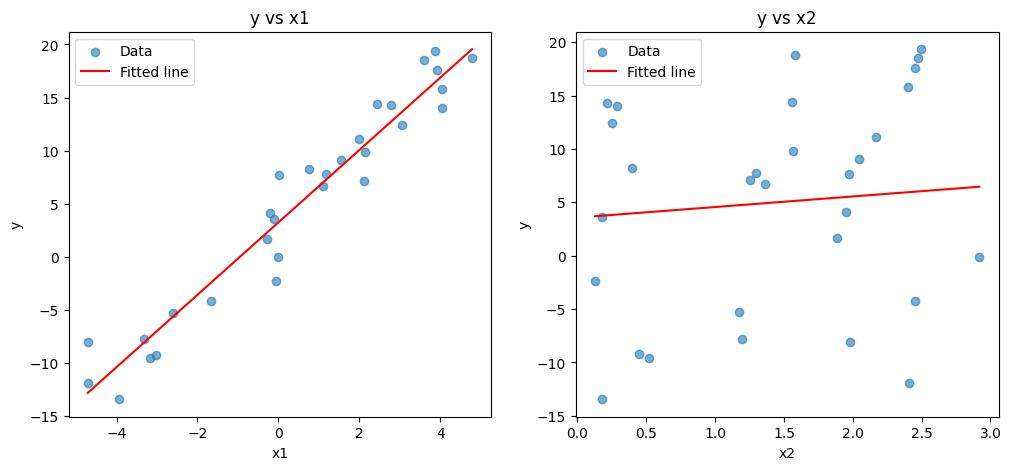

In [40]:
# y vs x1 (holding x2 constant at its mean)
x1_grid = np.linspace(x1.min(), x1.max(), 100)
y_pred_x1 = beta_hat[0] + beta_hat[1] * x1_grid + beta_hat[2] * np.mean(x2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y, label='Data', alpha=0.6)
plt.plot(x1_grid, y_pred_x1, color='red', label='Fitted line')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y vs x1')
plt.legend()

# y vs x2 (holding x1 constant at its mean)
x2_grid = np.linspace(x2.min(), x2.max(), 100)
y_pred_x2 = beta_hat[0] + beta_hat[1] * np.mean(x1) + beta_hat[2] * x2_grid

plt.subplot(1, 2, 2)
plt.scatter(x2, y, label='Data', alpha=0.6)
plt.plot(x2_grid, y_pred_x2, color='red', label='Fitted line')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y vs x2')
plt.legend()
